<a href="https://colab.research.google.com/github/Nivedha1205/Nivedha-s_Portfolio/blob/main/Hospital_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset:

In [ ]:
path = "/content/hospital data analysis.csv"

In [ ]:
hospital_data = pd.read_csv(path)

In [ ]:
hospital_data.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


# Dataset brief overview:

In [ ]:
hospital_data.shape

(984, 10)

In [ ]:
hospital_data.describe()

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


In [ ]:
hospital_data['Condition'].nunique()

15

In [ ]:
hospital_data['Condition'].unique()

array(['Heart Disease', 'Diabetes', 'Fractured Arm', 'Stroke', 'Cancer',
       'Hypertension', 'Appendicitis', 'Fractured Leg', 'Heart Attack',
       'Allergic Reaction', 'Respiratory Infection', 'Prostate Cancer',
       'Childbirth', 'Kidney Stones', 'Osteoarthritis'], dtype=object)

In [ ]:
hospital_data['Procedure'].nunique()

15

In [ ]:
hospital_data['Procedure'].unique()

array(['Angioplasty', 'Insulin Therapy', 'X-Ray and Splint',
       'CT Scan and Medication', 'Surgery and Chemotherapy',
       'Medication and Counseling', 'Appendectomy',
       'Cast and Physical Therapy', 'Cardiac Catheterization',
       'Epinephrine Injection', 'Antibiotics and Rest',
       'Radiation Therapy', 'Delivery and Postnatal Care', 'Lithotripsy',
       'Physical Therapy and Pain Management'], dtype=object)

In [ ]:
hospital_data['Satisfaction'].unique()

array([4, 3, 5, 2])

In [ ]:
hospital_data['Length_of_Stay'].unique()

array([ 5,  3,  1,  7, 10,  2,  4,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 66, 68,
       69, 70, 71, 72, 73, 74, 75, 76])

In [ ]:
hospital_data['Outcome'].unique()

array(['Recovered', 'Stable'], dtype=object)

In [ ]:
hospital_data['Cost'].sum()

np.int64(8233600)

# Data cleaning:

In [ ]:
hospital_data.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Condition,0
Procedure,0
Cost,0
Length_of_Stay,0
Readmission,0
Outcome,0
Satisfaction,0


In [ ]:
hospital_data.duplicated().sum()

np.int64(0)

In [ ]:
gender_summary = hospital_data.groupby('Gender').agg(
  no_of_patients = ("Gender", "count"),
  avg_age = ("Age", "mean"),
  min_age = ("Age", "min"),
  max_age = ("Age", "max"),
  avg_cost = ("Cost", "mean")
  )
print(gender_summary)

        no_of_patients    avg_age  min_age  max_age      avg_cost
Gender                                                           
Female             524  51.900763       30       78  10458.015267
Male               460  55.865217       25       78   5986.086957


# Data Exploration and visualization:

In [ ]:
#using for loop to find the distribution of data for categorical columns:
for col in hospital_data.columns:
  if hospital_data[col].dtype == 'object' and col != 'Patient_ID':
    print(hospital_data[col].value_counts())
    print( '--' )

Gender
Female    524
Male      460
Name: count, dtype: int64
--
Condition
Fractured Leg            67
Heart Attack             67
Fractured Arm            66
Hypertension             66
Appendicitis             66
Cancer                   66
Stroke                   66
Allergic Reaction        66
Diabetes                 65
Heart Disease            65
Respiratory Infection    65
Prostate Cancer          65
Childbirth               65
Kidney Stones            65
Osteoarthritis           64
Name: count, dtype: int64
--
Procedure
Cast and Physical Therapy               67
Cardiac Catheterization                 67
X-Ray and Splint                        66
Medication and Counseling               66
Appendectomy                            66
Surgery and Chemotherapy                66
CT Scan and Medication                  66
Epinephrine Injection                   66
Insulin Therapy                         65
Angioplasty                             65
Antibiotics and Rest                 

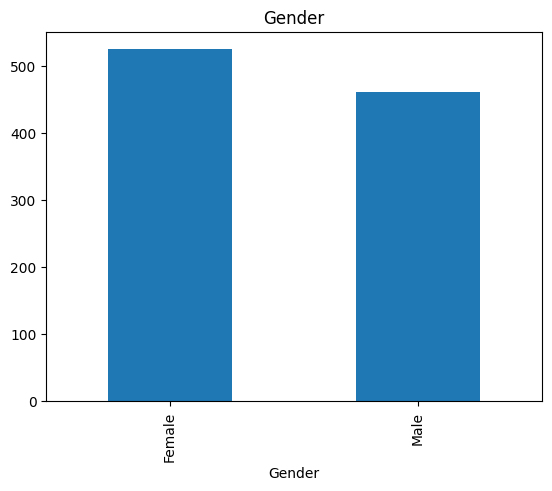

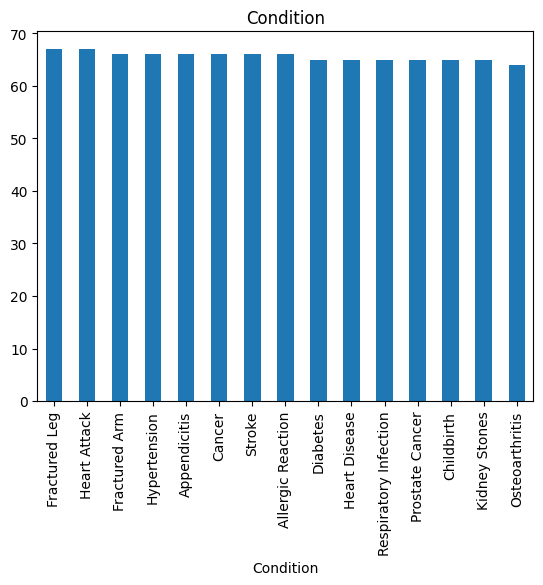

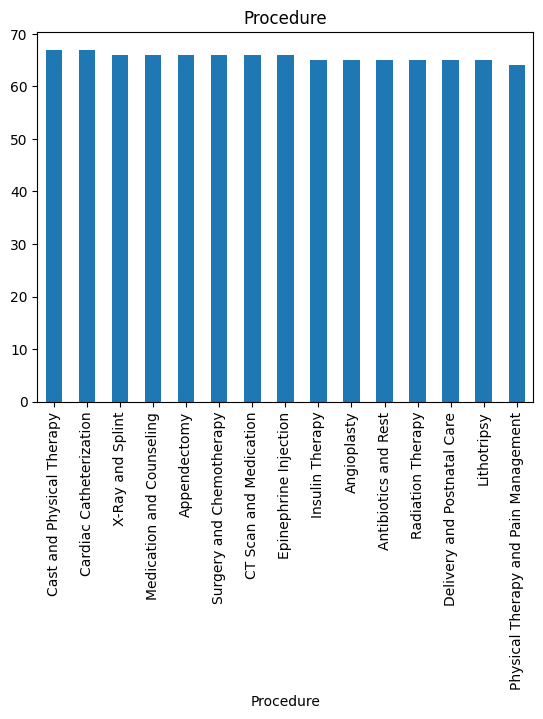

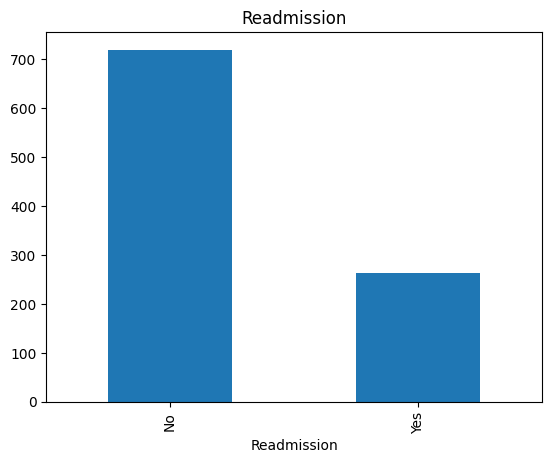

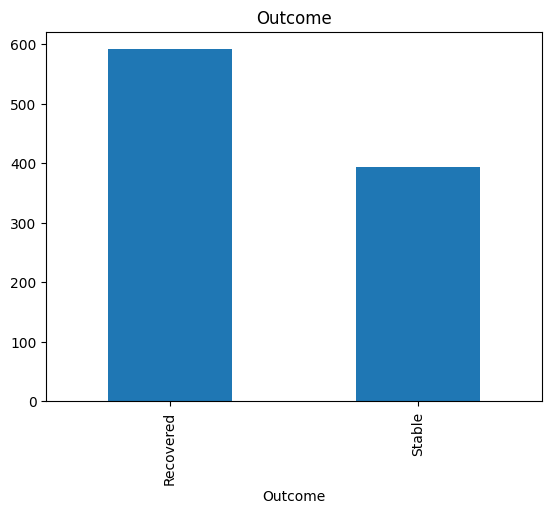

In [ ]:
#using for loop to find the frequency of categorical columns and plotted bar graph:
for col in hospital_data.columns:
  if hospital_data[col].dtype == 'object' and col != 'Patient_ID':
    hospital_data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


In [ ]:
#converting data into 2 dimensional using gender:
gender_medical_history = hospital_data.groupby(['Gender', 'Condition']).size().sort_values()
print(gender_medical_history)

Gender  Condition            
Female  Osteoarthritis           64
        Childbirth               65
        Heart Disease            65
        Respiratory Infection    65
Male    Kidney Stones            65
        Prostate Cancer          65
        Diabetes                 65
Female  Fractured Arm            66
Male    Stroke                   66
Female  Appendicitis             66
        Cancer                   66
Male    Allergic Reaction        66
        Hypertension             66
Female  Heart Attack             67
Male    Fractured Leg            67
dtype: int64


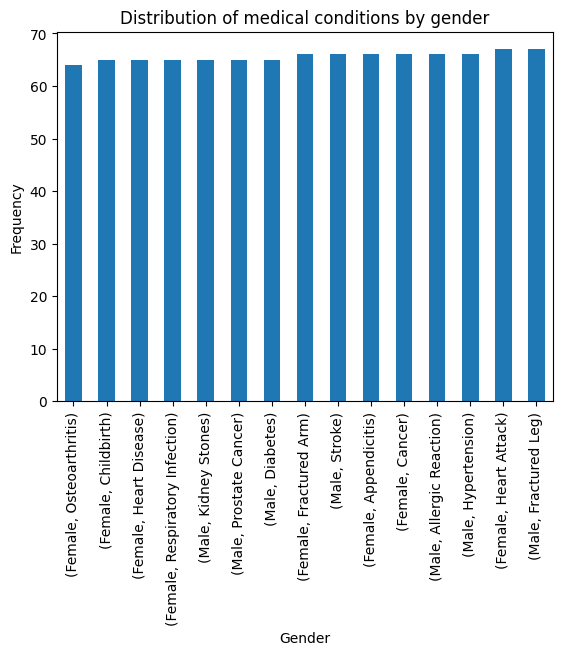

In [ ]:
#plotting bar graph for gender_medical_history:
gender_medical_history.plot(kind='bar')
plt.title('Distribution of medical conditions by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# top 10 grouping data by cost and patient id calculating their average bill amount:
top10_cost = hospital_data.groupby('Patient_ID')['Cost'].sum().sort_values(ascending = False)[:10].reset_index()
print(top10_cost)

   Patient_ID   Cost
0         965  25000
1           5  25000
2         365  25000
3         215  25000
4         950  25000
5          35  25000
6          20  25000
7         935  25000
8          80  25000
9          50  25000


In [ ]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = hospital_data.groupby(['Condition','Gender'])[['Cost']].mean().reset_index()
medical_gender_billing

,Condition,Gender,Cost
0,Allergic Reaction,Male,100.0
1,Appendicitis,Female,8000.0
2,Cancer,Female,25000.0
3,Childbirth,Female,12000.0
4,Diabetes,Male,2000.0
5,Fractured Arm,Female,500.0
6,Fractured Leg,Male,3000.0
7,Heart Attack,Female,18000.0
8,Heart Disease,Female,15000.0
9,Hypertension,Male,1000.0


In [ ]:
hospital_data['Age_Group'] = pd.cut(hospital_data['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = hospital_data['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

,count
Age_Group,
51-60,262
61-70,227
71-80,166
41-50,132
31-40,131
18-30,66
Over 80,0


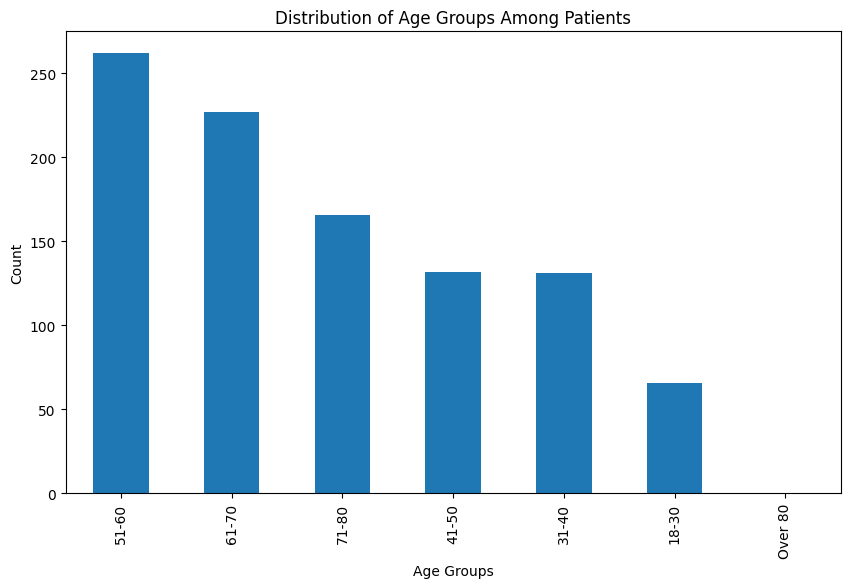

In [ ]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

# People with heart disease history:

In [ ]:
#groupby their conditions such as heart disease, stroke, hypertension, heart attack:
heart_disease_summary = hospital_data.groupby('Gender').agg(
    heart_disease_patients = ("Condition", lambda x: x.str.contains("Heart Disease").sum()),
    stroke_patients = ("Condition", lambda x: x.str.contains("Stroke").sum()),
    hypertension_patients = ("Condition", lambda x: x.str.contains("Hypertension").sum()),
    heartattack_patients = ("Condition", lambda x: x.str.contains("Heart Attack").sum()),
)
print(heart_disease_summary)


        heart_disease_patients  stroke_patients  hypertension_patients  \
Gender                                                                   
Female                      65                0                      0   
Male                         0               66                     66   

        heartattack_patients  
Gender                        
Female                    67  
Male                       0  


In [ ]:
print(heart_disease_summary.sum())

heart_disease_patients    65
stroke_patients           66
hypertension_patients     66
heartattack_patients      67
dtype: int64


# People with bone disease history:

In [ ]:
#groupby their conditions such as fractured arm, fractured leg, osteoarthritis:
bone_disease_summary = hospital_data.groupby('Gender').agg(
    fractured_arm_patients = ("Condition", lambda x: x.str.contains("Fractured Arm").sum()),
    fractured_leg_patients = ("Condition", lambda x: x.str.contains("Fractured Leg").sum()),
    osteoarthritis_patients = ("Condition", lambda x: x.str.contains("Osteoarthritis").sum()),
)
print(bone_disease_summary)

        fractured_arm_patients  fractured_leg_patients  \
Gender                                                   
Female                      66                       0   
Male                         0                      67   

        osteoarthritis_patients  
Gender                           
Female                       64  
Male                          0  


In [ ]:
print(bone_disease_summary.sum())

fractured_arm_patients     66
fractured_leg_patients     67
osteoarthritis_patients    64
dtype: int64


# People with abdominal disease history:

In [ ]:
#groupby their conditions such as appendicitis, prostate cancer, cancer, kidney stones:
abdominal_disease_summary = hospital_data.groupby('Gender').agg(
    appendicitis_patients = ("Condition", lambda x: x.str.contains("Appendicitis").sum()),
    prostate_cancer_patients = ("Condition", lambda x: x.str.contains("Prostate Cancer").sum()),
    cancer_patients = ("Condition", lambda x: x.str.contains("Cancer").sum()),
    kidney_stones_patients = ("Condition", lambda x: x.str.contains("Kidney Stones").sum()),
)
print(abdominal_disease_summary)


        appendicitis_patients  prostate_cancer_patients  cancer_patients  \
Gender                                                                     
Female                     66                         0               66   
Male                        0                        65               65   

        kidney_stones_patients  
Gender                          
Female                       0  
Male                        65  


In [ ]:
print(abdominal_disease_summary.sum())

appendicitis_patients        66
prostate_cancer_patients     65
cancer_patients             131
kidney_stones_patients       65
dtype: int64


# People with other medical conditions:

In [ ]:
#groupby their conditions such as diabetes, respiratory infection, allergic reaction, child birth:
other_medical_history = hospital_data.groupby('Gender').agg(
    diabetes_patients = ("Condition", lambda x: x.str.contains("Diabetes").sum()),
    respiratory_infection_patients = ("Condition", lambda x: x.str.contains("Respiratory Infection").sum()),
    allergic_reaction_patients = ("Condition", lambda x: x.str.contains("Allergic Reaction").sum()),
    childbirth_patients = ("Condition", lambda x: x.str.contains("Childbirth").sum()),
)
print(other_medical_history)

        diabetes_patients  respiratory_infection_patients  \
Gender                                                      
Female                  0                              65   
Male                   65                               0   

        allergic_reaction_patients  childbirth_patients  
Gender                                                   
Female                           0                   65  
Male                            66                    0  


In [ ]:
print (other_medical_history.sum())

diabetes_patients                 65
respiratory_infection_patients    65
allergic_reaction_patients        66
childbirth_patients               65
dtype: int64
